#### Question 1 : 1) Delivery_time -> Predict delivery time using sorting time 
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### Using Scikit 

Steps for the same :

1. Import necessary libraries

2. Load the data and perform EDA (Exploratory Data Analysis)

3. Check for missing values and outliers

4. Perform necessary transformations

5. Split the data into training and testing sets

6. Build a simple linear regression model on the training data

7. Evaluate the model on the testing data and calculate the R-squared value

8. Use the model to make predictions on new data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.formula.api as smf

We have imported all the libraries required to perform simple linear regression.

In [80]:
#Load the dataset
df = pd.read_csv('delivery_time.csv')
df.head()
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [14]:
#Check for missing values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

We can see that there are no null values in the data set

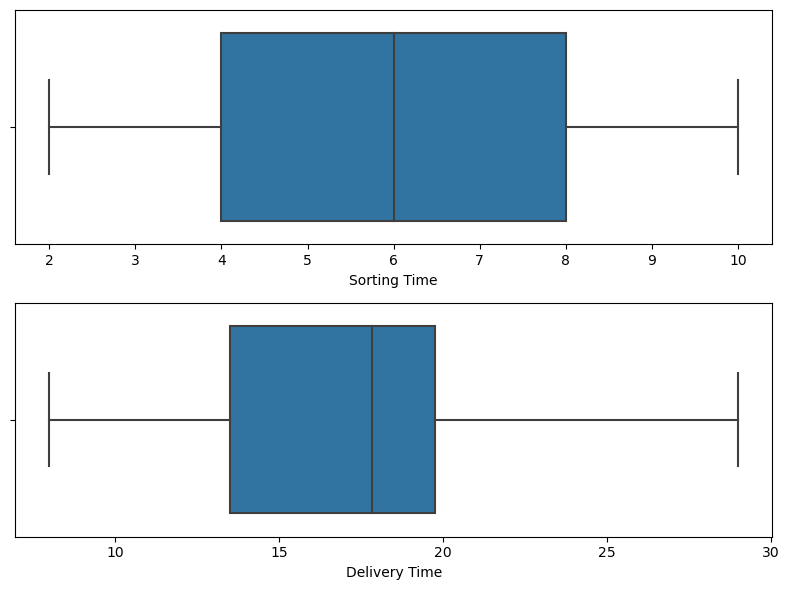

In [15]:
#Creating subplots and plotting the boxplots
figure, axes = plt.subplots(2, 1, figsize=(8,6))
sns.boxplot(x=df['Sorting Time'],ax = axes[0])
sns.boxplot(x=df['Delivery Time'],ax = axes[1])
plt.tight_layout()
plt.show()

Both the boxplots do not show any outliers for both the variables i.e. the Sorting Time and Delivery Time.

<Axes: xlabel='Delivery Time', ylabel='Count'>

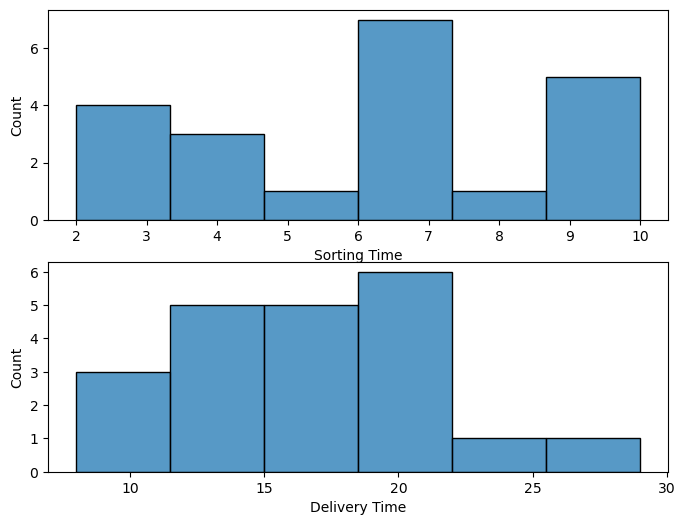

In [16]:
#Check the distribution of the variables
figure, axes = plt.subplots(2, 1, figsize=(8,6))
sns.histplot(df['Sorting Time'], ax=axes[0])
sns.histplot(df['Delivery Time'],ax=axes[1])

Inference is that the sorting time histogram, it is right skewed.
The histogram of Delivery time is that it is left skewed.

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

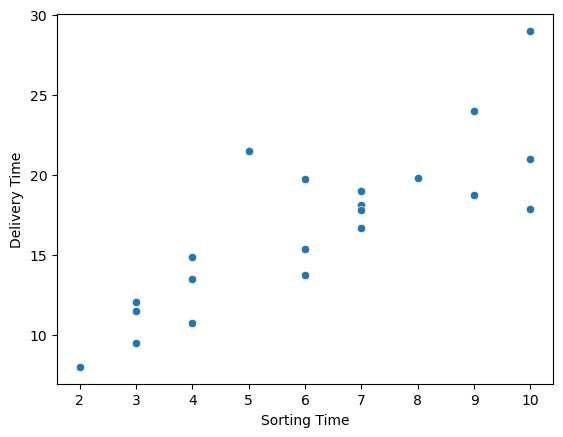

In [17]:
#Check for any correlation between the variables
sns.scatterplot(x=df['Sorting Time'], y=df['Delivery Time'])

Inference is that there a high amount of correlation between the delivery time and the sorting time .

In [81]:
#Prepare the data
X = df['Sorting Time'].values.reshape(-1,1)
Y = df['Delivery Time'].values.reshape(-1,1)

Before building the model, we need to prepare the data by separating the dependent variable (delivery time) from the independent variable (sorting time).

In [82]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#We can split the data into training and testing sets using the train_test_split function

In [83]:
#Train the model
#We can train the linear regression model using the LinearRegression class from scikit-learn
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

LinearRegression() function fits a linear regression model in Python.

Here, X_train represents the training set of input features, and Y_train represents the corresponding target values that you are trying to predict.

By calling the fit() method on the lr object and passing in the X_train and Y_train data, the model is trained to find the optimal values of the regression coefficients that minimize the sum of the squared errors between the predicted values and the actual values in the training data.



In [84]:
#Evaluate the model
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
print('R-squared value:', r2)
print('Mean squared error:', mse)
#We can evaluate the performance of the model using various metrics, such as the R-squared value and mean squared error:

R-squared value: -0.09171780724674106
Mean squared error: 18.17011449669186


Here, X_test represents the test set of input features, and y_pred represents the corresponding predicted target values. You can then evaluate the performance of your model using various metrics such as mean squared error, R-squared, or others depending on the problem at hand.

In [86]:
# Step 8: Use the model to make predictions on new data
new_data = np.array([8]).reshape(1, -1)
print("Delivery Time Prediction for the sorting time 8 :", regressor.predict(new_data))

Delivery Time Prediction for the sorting time 8 : [101280.70016446]


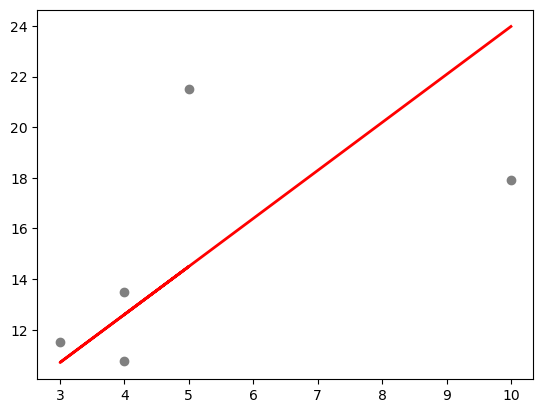

In [89]:
#Visualize the results
#We can visualize the model's predictions using a scatter plot
plt.scatter(X_test, Y_test, color='gray')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.show()

We can observe the line of the linear regression and along with that scatter plot points indicating the correlation.

#### Using Stats library 

In [87]:
# Renaming Columns
dataset=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
#Correlation Analysis
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


We can see a good correlation of 82.59 % between delivery_time and sorting_time. This means they have a positive correlation.

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

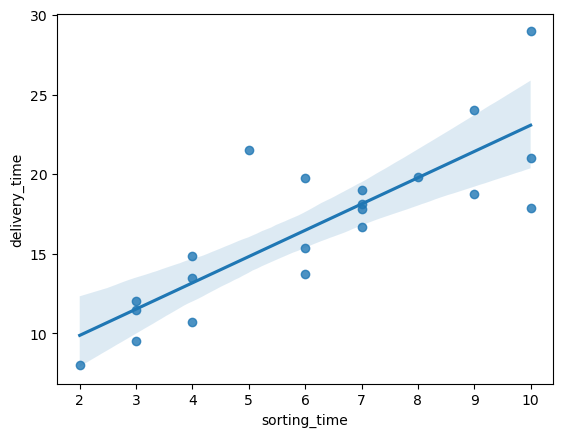

In [50]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

sns.regplot() is a function from the Python data visualization library seaborn. It is used to create a scatter plot with a linear regression line fit to the data points.

The arguments x and y are the variables to be plotted on the x and y axes, respectively. In this case, x is dataset['sorting_time'] and y is dataset['delivery_time'], assuming that dataset is a Pandas DataFrame with columns named 'sorting_time' and 'delivery_time'.

In [53]:
#Building a Model
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

The creation of the model is created with the help of ordinary least square method.
The variable delivery_time is a dependent or the target variable.
The variable sorting_time is a independent variable.
The data is the dataset of delivery_time.

In [55]:
#Testing the model
#Model Testing
# Finding Coefficient parameters
#Finding B0 and B1
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In our case ,the value of B0 is 6.58 and the value of B1 is 1.649.

In [56]:
# Finding tvalues and pvalues
#The value of t statistic and the probability value
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

The value of t for the intercept(B0) is 3.8233.
The value of t for the sorting_time(B1) is 6.387447.
The value of p for the intercept(B0) is 0.001147.
The value of p for the sorting_time(B1) is 0.000004.
The inference from the above values is checking the p-value is less than the level of significance(i.e. alpha). In our case the value of alpha is 0.05.
Performing hypothesis test,
For the value of intercept , we can reject the null hypothesis( alpha > p-value). The null hypothesis states that the values of B0 is 0 and the alternative hypothesis is that B0 is not equal to 0.

Looking at the p-value of the intercept, it is very much smaller than the level of significance (p < 0.05). This suggests that the estimated coefficients are statistically significant, and we can have some level of confidence in them.

For the value of B1 , we can reject the null hypothesis( alpha > p-value). The null hypothesis states that the values of B1 is 0 and the alternative hypothesis is that B1 is not equal to 0.

Looking at the p-value of the coefficient B1, it is very much smaller than the level of significance (p < 0.05). This suggests that the estimated coefficients are statistically significant, and we can have some level of confidence in them.

In [57]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

The value of R^2 we have is about 68.22 %. This means about 68.22 % of variation can be explained through this in the model.

In [58]:
#Model Predictions
#Testing the model
# Manual prediction for say sorting time 5
#Y=B0+B1*X
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

From the above values of B0 which is 6.58 and that of B1 is 1.649. We put the values of both the intercept and the coefficient to get the estimated delivery time for sorting time which is about 5.
We get a value of 14.827.

In [59]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [61]:
#Forming a data frame of the new data with the column name sorting_time
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [62]:
#Predicting the model for the values of 5 and 8 sorting_time
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

#### Question 2 :  Salary_hike -> Build a prediction model for Salary_hike
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#### Using stats methodology 

In [24]:
#Load the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [25]:
#Check for missing values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

We can see that there are no null values in the data set

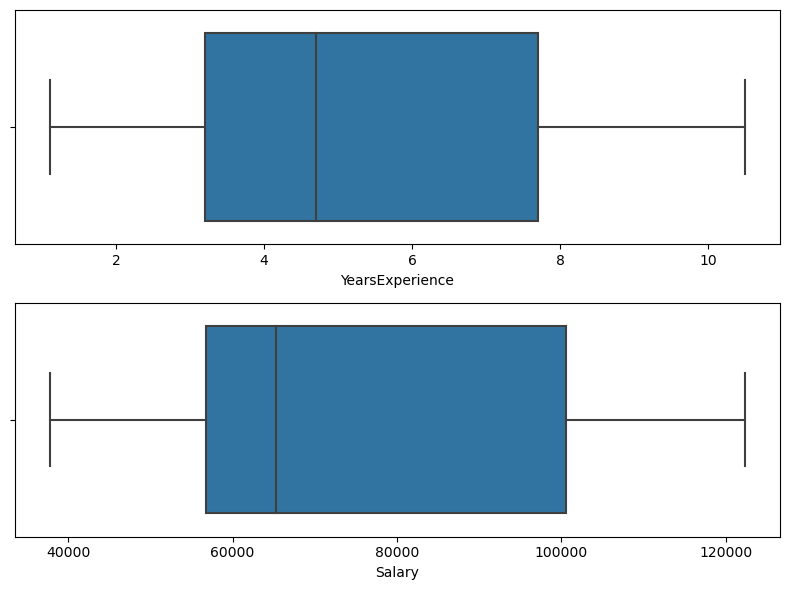

In [26]:
#Creating subplots and plotting the boxplots
figure, axes = plt.subplots(2, 1, figsize=(8,6))
sns.boxplot(x=df['YearsExperience'],ax = axes[0])
sns.boxplot(x=df['Salary'],ax = axes[1])
plt.tight_layout()
plt.show()

Both the boxplots do not show any outliers for both the variables i.e. the YearsExperience and the salary.

<Axes: xlabel='Salary', ylabel='Count'>

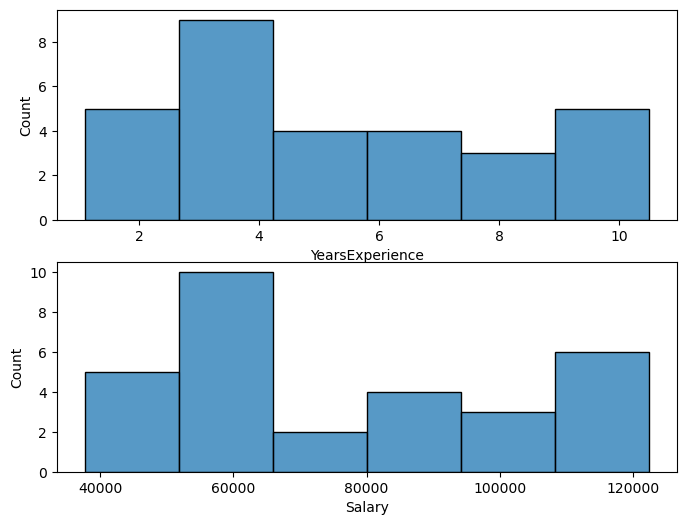

In [28]:
#Check the distribution of the variables
figure, axes = plt.subplots(2, 1, figsize=(8,6))
sns.histplot(df['YearsExperience'], ax=axes[0])
sns.histplot(df['Salary'],ax=axes[1])

Inference is that both the histograms i.e. the YearsExperience and Salary both are left skewed in nature.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

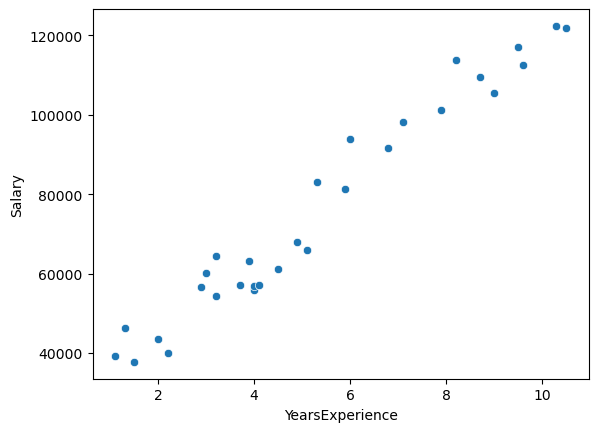

In [30]:
#Check for any correlation between the variables
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

Inference is that there a high amount of correlation between the YearsExperience and the Salary.

In [32]:
#Correlation Analysis
dataset=df
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


We can see a very good correlation of 97.82 % between YearsExperience and Salary . This means they have a positive correlation.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

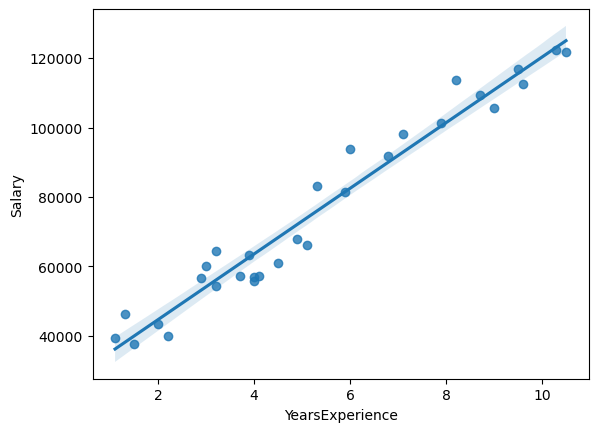

In [34]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

sns.regplot() is a function from the Python data visualization library seaborn. It is used to create a scatter plot with a linear regression line fit to the data points.
The arguments x and y are the variables to be plotted on the x and y axes, respectively. In this case, x is dataset['YearsExperience'] and y is dataset['Salary'].

In [37]:
#Building a Model
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

The creation of the model is created with the help of ordinary least square method. The variable Salary is a dependent or the target variable. The variable YearsExperience is a independent variable. The data is the dataset of Salary_data.

In [38]:
#Testing the model
#Model Testing
# Finding Coefficient parameters
#Finding B0 and B1
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In our case ,the value of B0 is  25792.20 and the value of B1 is 9449.962.

In [39]:
# Finding tvalues and pvalues
#The value of t statistic and the probability value
model.tvalues , model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

The value of t for the intercept(B0) is  11.346. The value of t for the YearsExperience(B1) is   24.950094. The value of p for the intercept(B0) is 5.511950e-12. The value of p for the YearsExperience(B1) is 1.143068e-20. The inference from the above values is checking the p-value is less than the level of significance(i.e. alpha). In our case the value of alpha is 0.05. Performing hypothesis test, For the value of intercept , we can reject the null hypothesis( alpha > p-value). The null hypothesis states that the values of B0 is 0 and the alternative hypothesis is that B0 is not equal to 0.
Looking at the p-value of the intercept, it is very much smaller than the level of significance (p < 0.05). This suggests that the estimated coefficients are statistically significant, and we can have some level of confidence in them.
For the value of B1 , we can reject the null hypothesis( alpha > p-value). The null hypothesis states that the values of B1 is 0 and the alternative hypothesis is that B1 is not equal to 0.
Looking at the p-value of the coefficient B1, it is very much smaller than the level of significance (p < 0.05). This suggests that the estimated coefficients are statistically significant, and we can have some level of confidence in them.

In [41]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

The value of R^2 we have is about 95.69 %. This means about 95.69 % of variation can be explained through this in the model.

In [43]:
#Model Predictions
#Testing the model
# Manual prediction for say YearsExperience is 4.2
#Y=B0+B1*X
Salary = 25792.200199 + 9449.962321*4.2
Salary

65482.04194720001

From the above values of B0 which is 25792.200199  and that of B1 is 9449.962321. We put the values of both the intercept and the coefficient to get the estimated salary for YearsExperience which is about 4.2. We get a value of 65482.04194720001.

In [45]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [49]:
#Forming a data frame of the new data with the column name sorting_time
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,8


In [50]:
#Predicting the model for the values of 5 and 8 sorting_time
model.predict(data_pred)

0     73042.011806
1    101391.898770
dtype: float64

For the above model, we get predictions for the folowing years of experience i.e. 5 and 8 respectively. The predictions we have is 73042.011806 and 101391.898770 respectively.

#### Using SciKit library

Steps for the same :

1. Import necessary libraries

2. Load the data and perform EDA (Exploratory Data Analysis)

3. Check for missing values and outliers

4. Perform necessary transformations

5. Split the data into training and testing sets

6. Build a simple linear regression model on the training data

7. Evaluate the model on the testing data and calculate the R-squared value

8. Use the model to make predictions on new data

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
YearsExperience    0
Salary             0
dtype: int64
R-squared value:  0.988169515729126
Salary prediction for experience 8 years:  [101280.70016446]


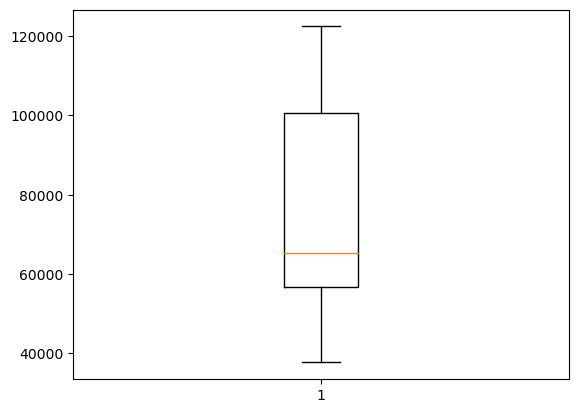

In [51]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [53]:
# Step 2: Load the data and perform EDA
data = pd.read_csv("Salary_Data.csv")
print(data.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


YearsExperience    0
Salary             0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x156b11bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x156b12110>,
 'boxes': [<matplotlib.lines.Line2D at 0x156b11930>],
 'medians': [<matplotlib.lines.Line2D at 0x156b12650>],
 'fliers': [<matplotlib.lines.Line2D at 0x156b128f0>],
 'means': []}

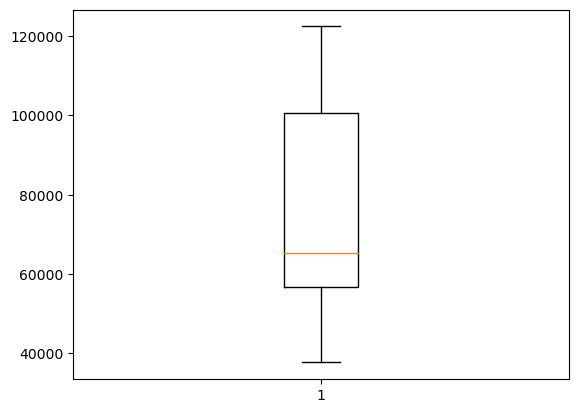

In [54]:
# Step 3: Check for missing values and outliers
print(data.isnull().sum()) # no missing values
plt.boxplot(data['Salary']) # no outliers

There are no null values in the dataset.
There are no outliers being seen in the boxplot.

In [56]:
# Step 4: Perform necessary transformations (not needed in this case)

In [74]:
# Step 5: Split the data into training and testing sets
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [90]:
# Step 6: Build a simple linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [76]:
# Step 7: Evaluate the model on the testing data and calculate the R-squared value
Y_pred = regressor.predict(X_test)
print("R-squared value: ", r2_score(Y_test, Y_pred))

R-squared value:  0.988169515729126


In [77]:
# Step 8: Use the model to make predictions on new data
new_data = np.array([8]).reshape(1, -1)
print("Salary prediction for experience 8 years: ", regressor.predict(new_data))

Salary prediction for experience 8 years:  [101280.70016446]
